<a href="https://colab.research.google.com/github/Aswin-Kumar66/ml-practise/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [119]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [138]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 1020.6 KB


In [ ]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [121]:
train = train.drop_duplicates()

<ipython-input-39-bce6a73cb392>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , cmap = 'crest'  , annot = True)


<Axes: >

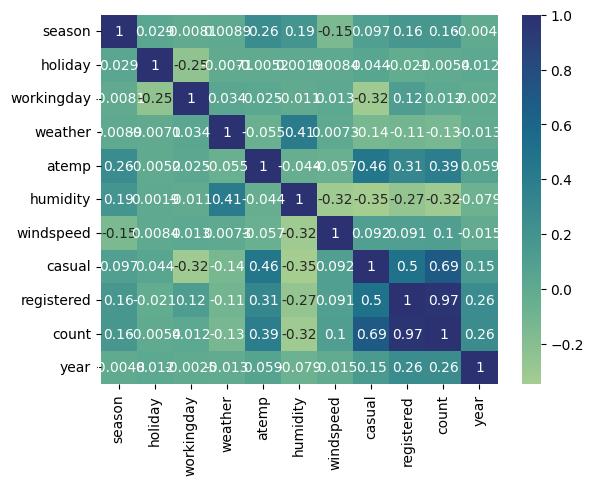

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(train.corr() , cmap = 'crest'  , annot = True)

In [ ]:
# train = train.drop('temp' , axis = 1)

In [139]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


<ipython-input-44-bdc6846945bf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , cmap = 'crest'  , vmin = 0)


<Axes: >

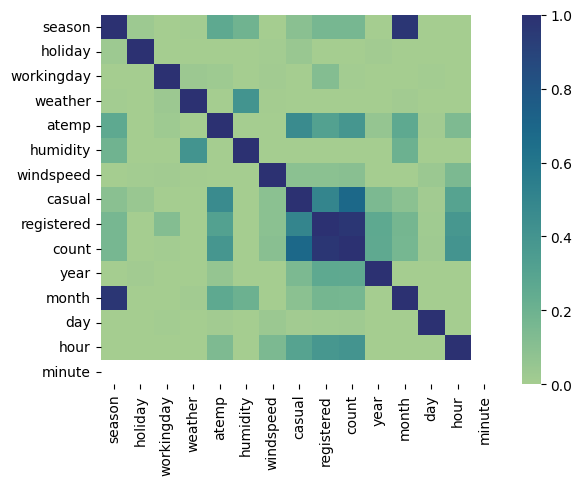

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(train.corr() , cmap = 'crest'  , vmin = 0)

In [ ]:
train['hum/weather'] = train['humidity']/train['weather']
train.drop(['minute' , 'day'] , axis = 1 , inplace = True)

KeyError: "['minute', 'day'] not found in axis"

In [ ]:

train.drop(['hum/weather'] , axis = 1 , inplace = True)

In [140]:
X = train.drop(['casual' , 'registered' , 'count' , 'datetime'], axis =  1)
y = train['count']

In [112]:
X.nunique()

season         4
holiday        2
workingday     2
weather        4
temp          49
atemp         60
humidity      89
windspeed     28
dtype: int64

In [ ]:
print(X['season'].value_counts())
print(X['holiday'].value_counts())
print(X['workingday'].value_counts())
print(X['weather'].value_counts())

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


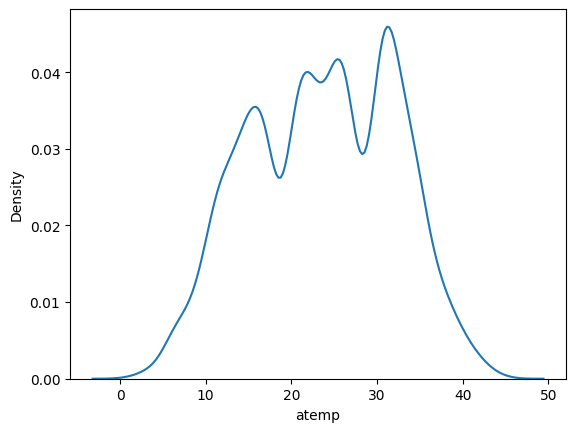

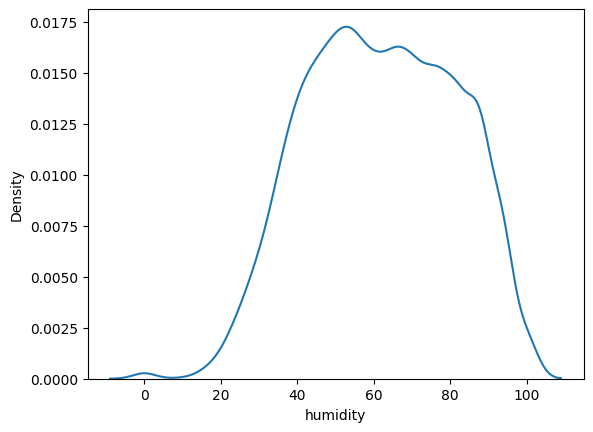

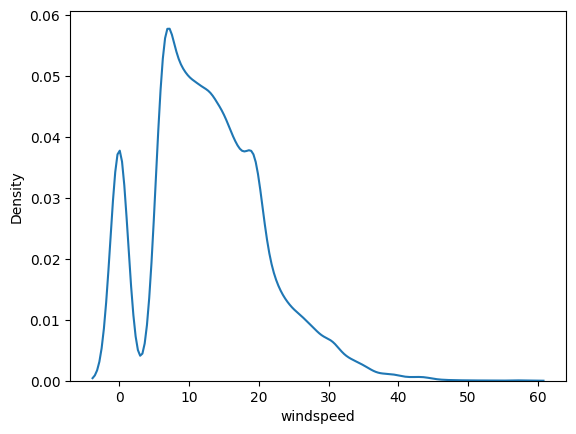

In [ ]:
col = ['atemp' , 'humidity' , 'windspeed']

for i in col :
  sns.kdeplot(train[i])
  plt.show()

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
s = scaler.fit(X)

X = s.transform(X)

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [159]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold, TimeSeriesSplit

model = LGBMRegressor()


params = {'n_estimators': [100, 150, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.05, 0.1, 0.15]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_model = GridSearchCV(estimator=model,
                               param_grid = params,
                               scoring=rmsle_scorer,
                               cv=3)

log_y = np.log(y_train)
gridsearch_model.fit(X_train, log_y)
print(gridsearch_model.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

In [160]:
log_y_2 = np.log(y_test)
predictions = gridsearch_model.best_estimator_.predict(X_test)

print(f'RMSLE: {rmsle(log_y_2, predictions, True):.5f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSLE: 0.30966


In [155]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test.drop([ 'datetime'] , axis = 1 , inplace = True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4


In [161]:
test_predictions = gridsearch_model.best_estimator_.predict(test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [162]:
sample = pd.read_csv('sampleSubmission.csv')

In [164]:
sample['count'] = np.exp(test_predictions)
sample.to_csv('submission.csv', index=False)